# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

If needed link files into one common directory to look at multiple days.

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control_cmaq-rrfs_surface.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-01-12:00:00',
  'end_time': '2019-08-01-14:00:00',
  'output_dir': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/',
  'debug': True},
 'model': {'cmaq_expt': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/cmaq/*801*',
   'mod_type': 'cmaq',
   'mod_kwargs': {'concatenate_forecasts': True},
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '-'}},
  'rrfs_r131v1_pm25': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc',
   'files_pm25': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/rrfs/*0801*pm25tot_f*.nc',
   'mod_type': 'rrfs',
   'mod_kwargs': {'mech': 'cb6r3_ae6_aq', 'surf_only': True},
   'radius_of_influence': 19500,
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}},
   'projec

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_expt
{'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/cmaq/*801*', 'mod_type': 'cmaq', 'mod_kwargs': {'concatenate_forecasts': True}, 'radius_of_influence': 18000, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '-'}}
/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/cmaq/*801*
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[#########################

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


rrfs_r131v1_pm25
{'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc', 'files_pm25': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/rrfs/*0801*pm25tot_f*.nc', 'mod_type': 'rrfs', 'mod_kwargs': {'mech': 'cb6r3_ae6_aq', 'surf_only': True}, 'radius_of_influence': 19500, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': 'x', 'linestyle': '-'}}
/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surface_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  0.9s
[####

In [8]:
an.models

{'cmaq_expt': <driver.model at 0x7f3bd17f5588>,
 'rrfs_r131v1_pm25': <driver.model at 0x7f3c649503c8>}

In [9]:
an.models['cmaq_expt'].obj

<xarray.Dataset>
Dimensions:    (time: 24, x: 442, y: 265, z: 1)
Coordinates:
  * time       (time) datetime64[ns] 2019-08-01T13:00:00 ... 2019-08-02T12:00:00
    longitude  (y, x) float64 -120.6 -120.5 -120.4 ... -58.98 -58.83 -58.69
    latitude   (y, x) float64 21.89 21.92 21.95 21.97 ... 47.88 47.84 47.79
Dimensions without coordinates: x, y, z
Data variables: (12/21)
    CO         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NO         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NO2        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NOX        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NOY        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    O3         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    ...         ...
    PM25_SO4   (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PM25_SOIL  (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PM25_TOT   (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PMC_TOT    (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    SO2        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    VOC        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
Attributes: (12/35)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.1 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019216
    CTIME:          15159
    WDATE:          2019216
    ...             ...
    UPNAM:          csum            
    VAR-LIST:       O3              CO              NO              NO2      ...
    FILEDESC:                                                                ...
    HISTORY:        Mon Sep 27 16:11:32 2021: ncks -d TSTEP,0,23 aqm.20190801...
    NCO:            4.7.0
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [11]:
an.models['rrfs_r131v1_pm25'].obj

<xarray.Dataset>
Dimensions:         (time: 24, x: 393, y: 225, z: 1)
Coordinates:
    latitude        (y, x) float64 dask.array<chunksize=(225, 393), meta=np.ndarray>
    longitude       (y, x) float64 dask.array<chunksize=(225, 393), meta=np.ndarray>
  * time            (time) datetime64[ns] 2019-08-01T13:00:00 ... 2019-08-02T...
Dimensions without coordinates: x, y, z
Data variables: (12/15)
    temperature_k   (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    surfpres_pa     (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    dp_pa           (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    surfalt_m       (time, z, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dz_m            (time, z, y, x) float32 46.44 46.44 46.44 ... 46.03 46.06
    PM25_TOT        (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    ...              ...
    PM25_NO3        (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    PM25_SO4        (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    PM25_OC         (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    PM25_OM         (time, z, y, x) float32 dask.array<chunksize=(1, 1, 225, 393), meta=np.ndarray>
    pres_pa_mid     (time, z, y, x) float32 1.013e+05 1.013e+05 ... 1.012e+05
    alt_msl_m_full  (time, z, y, x) float32 46.44 46.44 46.44 ... 46.03 46.06
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           393
    ny:           225
    lon1:         -121.70231097
    lat1:         22.57417972
    dx:           13000.0
    dy:           13000.0

In [ ]:
#an.models['rrfs_25km'].obj
#an.models['rrfs_25km'].obj.isel(z=0).expand_dims('z',axis=1)

In [ ]:
an.models['wrfchem_v4.2'].obj
#All the info in the model class can be called here.
#print(an.models['cmaq_oper'].label)
#print(an.models['cmaq_oper'].mapping)

In [ ]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [5]:
an.open_obs()

In [ ]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

In [6]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.7s


Reference std: 4.920975828201896
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[##############

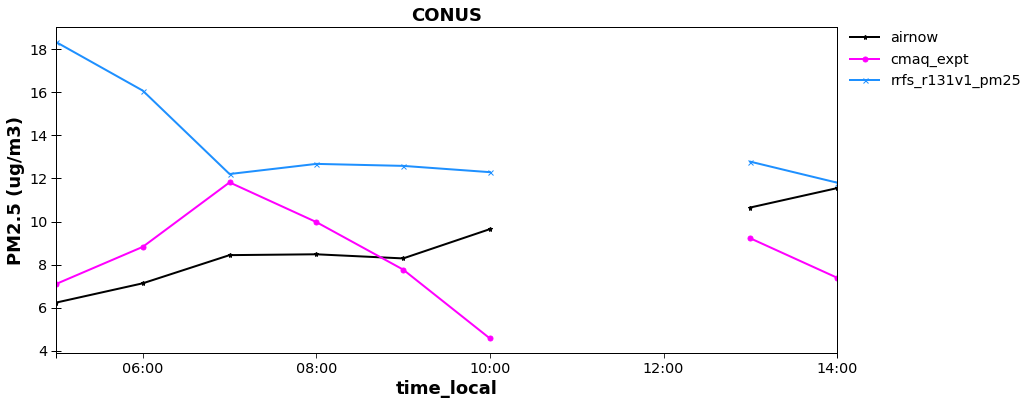

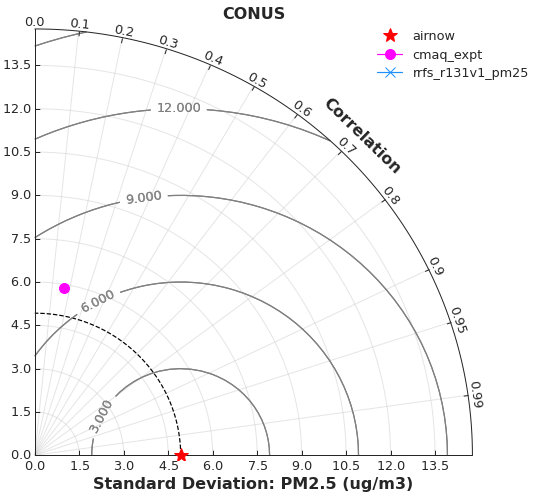

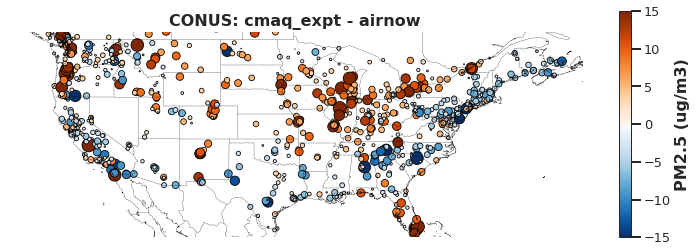

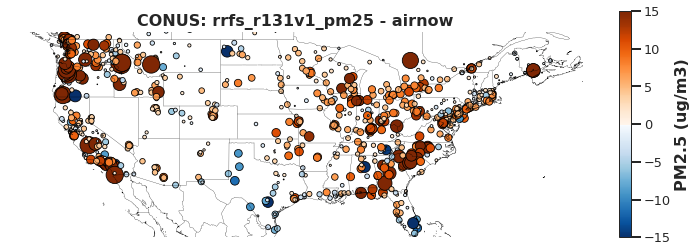

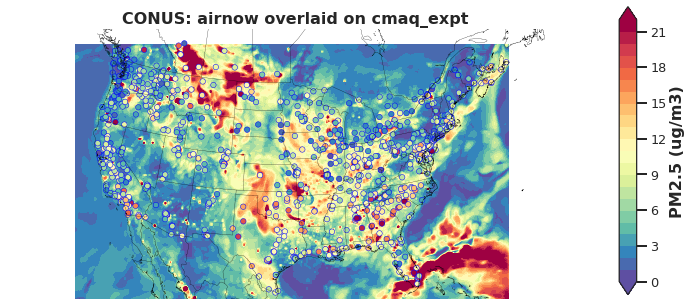

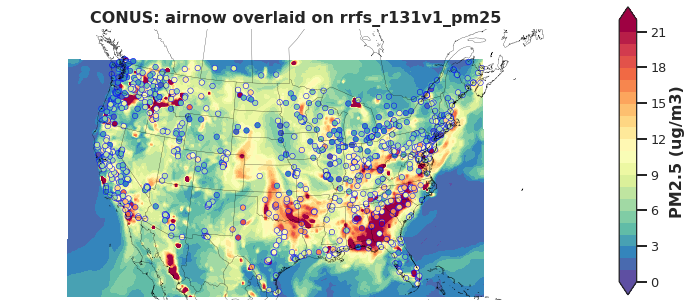

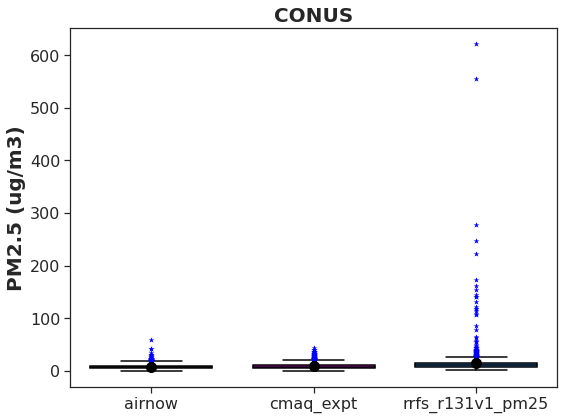

In [7]:
#And this generates all the plots.
an.plotting()

In [ ]:
an.stats()